# 🥫 Food Interventions and Food Demand in Montreal 🥫

This project analyzes a variety of different indicators for food insecurity and relative food assets in Montreal. In the last five months, Montreal residents have experienced upwards of 11% increases in grocery prices (stats can), exacerbating an already-existing challenge for people living in the city. Montreal’s economic and social landscapes have influenced the ways in which this issue has been addressed. According to Moisson Montreal's [Hunger Count Report](https://www.moissonmontreal.org/wp-content/uploads/2023/02/Hunger-Count-2022.pdf) of 2021, the city accounts for more than 39% of the total food assistance in Quebec while representing only 21% of the population. As such, it is necessary to provide visualizations and forms of analysis that can be used as tools for understanding the distribution of food assets relative to food demand in the city of Montreal. 

The data for this project was collected from Montreal's open data portal. Notably, the data that contains food aid organizations used in this project was filtered from a larger dataset containing all food establishments in Montreal. This resulted in the findings of only 239 open estbalishments providing food aid. There is no analysis on the Montreal website regarding what these organizations provide, which should be considered in relation to other studies that have been done on the distribution of food aid interventions in Montreal. For example, a [report](https://www.moissonmontreal.org/wp-content/uploads/2019/07/Portrait-of-food-security-organizations-on-the-island-of-Montreal.pdf) on the portrait of food security organizations by Moisson Montreal found 668 community organizations participating in food aid throughout the city. Some of the organization types in the study included food assistance, food banks, community kitchens, and mobile kitchens. On the other hand, the data used in this is from Montreal's website to see how the distribution between the two projects compare.  

This project uses the following data to represent the analysis: 




The code cell below imports all packages necessary for the project. Run this cell and use the choose files tab to also load in the necessary documents as found in the data folder. You will need the following documents:


*   `besoins-aide-alimentaires.csv`
*   `businesses.csv`
*   `businesses_food_open_complete.csv`
*   `limites-administratives-agglomeration-nad83.geojson`
* `montreal_boroughs_census.geojson`
* `suivis-aide-alimentaire.csv` 

Please note that `businesses_food_open_complete.csv` is a subset of businesses that are `type='Organisme d'aide alimentaire'` and `status='ouvert'` that is created within this notebook. The file initially had NA's in businesses for the latitude and longitude, whereby each was found and manually computed into the csv file using the addresses provided. 




In [2]:
%pip install folium mapclassify matplotlib geopandas plotnine
import geopandas as gpd
import pandas as pd
from google.colab import files
 

uploaded = files.upload()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 34.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 56.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 50.5 MB/s eta 0:00:00


Saving besoins-aide-alimentaire.csv to besoins-aide-alimentaire.csv
Saving businesses.csv to businesses.csv
Saving businesses_food_open_complete.csv to businesses_food_open_complete.csv
Saving demandes-aide-alimentaire.csv to demandes-aide-alimentaire.csv
Saving limites-administratives-agglomeration-nad83.geojson to limites-administratives-agglomeration-nad83.geojson
Saving montreal_boroughs_census.geojson to montreal_boroughs_census.geojson
Saving suivis-aide-alimentaire.csv to suivis-aide-alimentaire.csv


In the next code cell, we are subsetting for type = aide alimentaire and status = open. We are also reading in the csv files needed for this project. This filters through all of the different food establishments within the open data set that is provided by the city of Montreal. Since we are only concerned with food aid establishments, all other food establishments are unecessary for the analysis and are therefore dropped. We also need to ensure that the establishments are open, so we filter out businesses that are closed in 2021. We end up with 239 businesses. The data provided by the city of Montreal is open and geocoded, whereas other ones were not/needed manual integration of geolocations. 

In [3]:
#Reading in each csv file 
demandes = pd.read_csv("demandes-aide-alimentaire.csv")
suivis = pd.read_csv("suivis-aide-alimentaire.csv")
businesses = pd.read_csv("businesses.csv")

#Creating a new df that contains the open businesses
biz = businesses[businesses["type"] == "Organisme d'aide alimentaire"]
biz = biz[biz["statut"] == "Ouvert"]
biz # 239 type is aide alimentaire and status is ouvert

df_final = demandes.join(suivis.set_index('ID_Appels'), on="ID_Appels", how="left")
df_final.to_csv("demandes_final.csv")
biz.to_csv("businesses_food_open.csv")

#Downloading the new files 
files.download("demandes_final.csv")
files.download("businesses_food_open.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Loading administrative boundary data and census data. We then join both based on their shared column/borough name = `'NOM_OFFICIEL'`. This will allow us to create visualizations and produce mapping data.

In [4]:
boundaries = gpd.read_file("limites-administratives-agglomeration-nad83.geojson")
census = gpd.read_file("montreal_boroughs_census.geojson")

#Here, we are joining both dataframes by the borough names = 'NOM_OFFICIEL'
boundaries = boundaries.join(census.set_index("NOM_OFFICIEL"), on="NOM_OFFICIEL", how="left", rsuffix="right").reset_index()
boundaries = boundaries.drop(columns="geometryright")

Checking that the spelling matches for joining in the future:

In [5]:
unique_names = boundaries["NOM_OFFICIEL"].unique()
df_names = pd.DataFrame(unique_names) 
df_names.sort_values(0)

0
26                     Ahuntsic-Cartierville
0                                      Anjou
15                               Baie-D'Urfé
21                              Beaconsfield
20                            Côte-Saint-Luc
17       Côte-des-Neiges–Notre-Dame-de-Grâce
13                       Dollard-Des Ormeaux
31                                    Dorval
5                                  Hampstead
3                                   Kirkland
30             L'Île-Bizard–Sainte-Geneviève
19                              L'Île-Dorval
33                                   LaSalle
16                                   Lachine
11                     Le Plateau-Mont-Royal
8                               Le Sud-Ouest
6              Mercier–Hochelaga-Maisonneuve
24                                Mont-Royal
14                              Montréal-Est
23                             Montréal-Nord
25                            Montréal-Ouest
28                                 Outremont
22                       Pierrefonds-Roxboro
1                              Pointe-Claire
9   Rivière-des-Prairies–Pointe-aux-Trembles
2                  Rosemont–La Petite-Patrie
32                             Saint-Laurent
27                             Saint-Léonard
10                   Sainte-Anne-de-Bellevue
7                                 Senneville
12                                    Verdun
29                               Ville-Marie
18      Villeray–Saint-Michel–Parc-Extension
4                                  Westmount

In [6]:
unique_names = pd.DataFrame(df_final["Municipalite-arrondissement"].unique())
unique_names.sort_values(0)

0
3                      Ahuntsic-Cartierville
18                                     Anjou
34                               Baie-D'Urfé
30                              Beaconsfield
4                             Côte-Saint-Luc
8        Côte-des-Neiges—Notre-Dame-de-Grâce
12                       Dollard-Des Ormeaux
27                                    Dorval
29                                 Hampstead
22                          Inconnu-Montréal
26                                  Kirkland
28             L'Île-Bizard—Sainte-Geneviève
21                                   LaSalle
2                                    Lachine
0                      Le Plateau-Mont-Royal
5                               Le Sud-Ouest
6              Mercier—Hochelaga-Maisonneuve
19                                Mont-Royal
24                                  Montréal
16                              Montréal-Est
9                              Montréal-Nord
32                            Montréal-Ouest
25                                 Outremont
20                       Pierrefonds-Roxboro
10                             Pointe-Claire
15  Rivière-des-Prairies—Pointe-aux-Trembles
11                 Rosemont—La Petite-Patrie
13                             Saint-Laurent
7                              Saint-Léonard
23                   Sainte-Anne-de-Bellevue
17                                    Verdun
14                               Ville-Marie
1       Villeray—Saint-Michel—Parc-Extension
31                                 Westmount
33                                       NaN

Fixing the spelling that doesn't match between both datasets:

In [7]:
#The names in the boundaries file did not match the names in the 'Besoins" files. Here I am changing the names so that they match using the iloc function
boundaries.loc[boundaries['NOM_OFFICIEL'] == 'Côte-des-Neiges–Notre-Dame-de-Grâce', 'NOM_OFFICIEL'] = 'Côte-des-Neiges—Notre-Dame-de-Grâce'
boundaries.loc[boundaries['NOM_OFFICIEL'] == "L'Île-Bizard–Sainte-Geneviève", 'NOM_OFFICIEL'] = "L'Île-Bizard—Sainte-Geneviève"
boundaries.loc[boundaries['NOM_OFFICIEL'] == 'Mercier–Hochelaga-Maisonneuve', 'NOM_OFFICIEL'] = 'Mercier—Hochelaga-Maisonneuve'
boundaries.loc[boundaries['NOM_OFFICIEL'] == 'Rivière-des-Prairies–Pointe-aux-Trembles', 'NOM_OFFICIEL'] = 'Rivière-des-Prairies—Pointe-aux-Trembles'
boundaries.loc[boundaries['NOM_OFFICIEL'] == 'Rosemont–La Petite-Patrie', 'NOM_OFFICIEL'] = 'Rosemont—La Petite-Patrie'
boundaries.loc[boundaries['NOM_OFFICIEL'] == 'Villeray–Saint-Michel–Parc-Extension', 'NOM_OFFICIEL'] = 'Villeray—Saint-Michel—Parc-Extension'

In the next code cell, we are obtaining the count of food assistance requests per Montreal borough and binding that data to our `boundaries` object. The top three boroughs in terms of the raw number of requests were:
1. Mercier-Hochelaga-Maisonneuve: 1280 requests
2. Rosemont—La Petite-Patrie: 1122 requests 	
3. Montréal-Nord: 1084 requests

The boroughs with the lowest number of requests were:
32. Sainte-Anne-de-Bellevue: 4 requests
33. Beaconsfield: 4 requests	
34. Baie-D'Urfé: 2 requests	


In [8]:
df_final["Borough"] = df_final["Municipalite-arrondissement"] # create new var called Borough
callcount = pd.DataFrame(df_final.groupby("Borough")["ID_Appels"].count().reset_index()) # get count per Borough
boundaries = boundaries.join(callcount.set_index("Borough"), 
                             on="NOM_OFFICIEL", 
                             how="left").reset_index() # left join onto boundaries object by Borough

boundaries.to_file(filename = 'boundaries_complete.geojson', driver = 'GeoJSON')

callcount.sort_values("ID_Appels", ascending=False)

Borough  ID_Appels
16             Mercier—Hochelaga-Maisonneuve       1280
26                 Rosemont—La Petite-Patrie       1122
20                             Montréal-Nord       1084
32      Villeray—Saint-Michel—Parc-Extension        984
0                      Ahuntsic-Cartierville        865
31                               Ville-Marie        815
5        Côte-des-Neiges—Notre-Dame-de-Grâce        675
14                     Le Plateau-Mont-Royal        556
15                              Le Sud-Ouest        531
25  Rivière-des-Prairies—Pointe-aux-Trembles        525
27                             Saint-Laurent        501
28                             Saint-Léonard        455
12                                   LaSalle        447
13                                   Lachine        245
1                                      Anjou        224
30                                    Verdun        206
23                       Pierrefonds-Roxboro        112
9                           Inconnu-Montréal        100
4                             Côte-Saint-Luc         80
19                              Montréal-Est         45
24                             Pointe-Claire         36
17                                Mont-Royal         34
6                        Dollard-Des Ormeaux         34
7                                     Dorval         30
22                                 Outremont         27
33                                 Westmount         23
11             L'Île-Bizard—Sainte-Geneviève         21
18                                  Montréal         20
10                                  Kirkland          5
8                                  Hampstead          5
21                            Montréal-Ouest          4
29                   Sainte-Anne-de-Bellevue          4
3                               Beaconsfield          4
2                                Baie-D'Urfé          2

Here, we are creating a function that will allow us to plot different variables grouped by borough with the data that we produce. 

In [9]:
from plotnine import ggplot, aes, geom_bar, coord_flip, labs

# create barplot function
#"Shepherd {} is on duty.".format(shepherd)

def barplot(x, y, xlab, ylab):

  bp = (
      ggplot(boundaries)
      + aes(x='reorder({}, {})'.format(x, y), y=y)
      + geom_bar(stat="identity")
      + coord_flip()
      + labs(x = xlab, y = ylab)
  )

  return bp

The barplot below 

/usr/local/lib/python3.9/dist-packages/plotnine/layer.py:391: PlotnineWarning: position_stack : Removed 2 rows containing missing values.


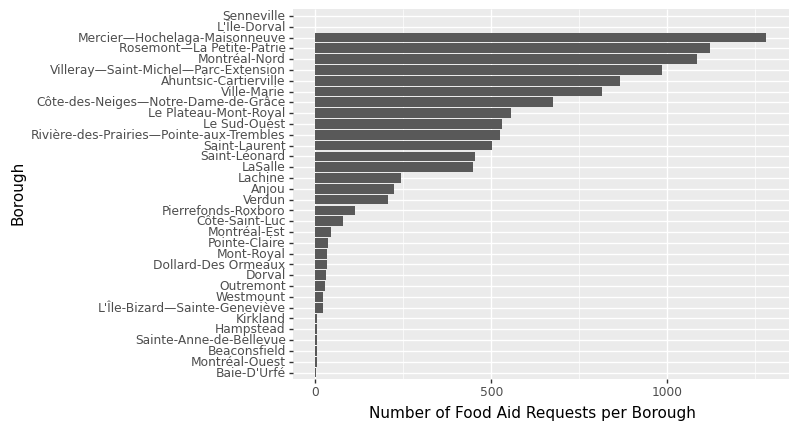

<ggplot: (8780848988311)>

In [10]:
#barplot(x-axis, y-axis, xlab, ylab) 
barplot("NOM_OFFICIEL", "ID_Appels", "Borough", "Number of Food Aid Requests per Borough")

In [11]:
# get the count of businesses within each borough
biz2 = pd.read_csv("businesses_food_open_complete.csv")

from shapely.geometry import Point

locations = pd.DataFrame({
    "latitude": biz2["latitude"],
    "longitude": biz2["longitude"],
    "business": biz2["name"]
})

locations["geometry"] = locations.apply(lambda row: Point(row["longitude"], row["latitude"]), axis=1)

locations_gdf = gpd.GeoDataFrame(locations, crs=4326, geometry="geometry")

locations_gdf = locations_gdf.to_crs(epsg=32188)

joined = gpd.sjoin(locations_gdf, boundaries)

biznum = pd.DataFrame(joined.groupby("NOM_OFFICIEL")["business"].count().sort_values(ascending=False))

# add number of business to boundary data
boundaries = boundaries.join(biznum, on="NOM_OFFICIEL", how="left")

biznum

business
NOM_OFFICIEL                                      
Ville-Marie                                     44
Villeray—Saint-Michel—Parc-Extension            26
Mercier—Hochelaga-Maisonneuve                   24
Le Plateau-Mont-Royal                           22
Le Sud-Ouest                                    22
Rosemont—La Petite-Patrie                       17
Ahuntsic-Cartierville                           16
Côte-des-Neiges—Notre-Dame-de-Grâce             12
Montréal-Nord                                   10
Saint-Laurent                                    8
Rivière-des-Prairies—Pointe-aux-Trembles         7
Lachine                                          5
LaSalle                                          5
Saint-Léonard                                    5
Pointe-Claire                                    4
Verdun                                           4
Anjou                                            3
L'Île-Bizard—Sainte-Geneviève                    1
Mont-Royal                                       1
Pierrefonds-Roxboro                              1
Dorval                                           1
Montréal-Est                                     1

## Mapping Our Data 
In the next code cells, we are creating the first interactive map that looks at the the distribution of food aid establishments. We are randomly generating a color for each borough to be plotted onto the map. We are also plotting a marker for the location of each establishment. We are also cleaning the data as the percentage of low income per borough needs to be converted from a decimal, and we also want to know the amount of requests for food assitance per 1000 residents. This gives us a better idea of the demand for food aid by borough rather than just looking at the total population and total requests per borough. 

In [12]:
import folium
from folium.features import GeoJsonTooltip
import numpy as np

In [13]:
#Cleaning the data: converting percLowInc into a %, calculating the requests per 1000 residents, and requests per number of businesses in each borough
boundaries["pct_low_income"] = round(boundaries["percLowInc"]*100, 2)
boundaries["requests_per_1000"] = round((boundaries["ID_Appels"]/boundaries["pop16"]*1000), 2)
boundaries["requests_per_business"] = round(boundaries["ID_Appels"]/boundaries["business"], 2)

boundaries["Borough"] = boundaries["NOM_OFFICIEL"]
boundaries["NumberOfRequests"] = boundaries["ID_Appels"]
boundaries["Population2016"] = boundaries["pop16"]
boundaries["PctLowIncome"] = boundaries["pct_low_income"]
boundaries["RequestsPer1000"] = boundaries["requests_per_1000"]
boundaries["NumberOfBusinesses"] = boundaries["business"]
boundaries["RequestsPerBusiness"] = boundaries["requests_per_business"]

In [14]:
#Setting the location of the map to Montreal
newmap = folium.Map(location=[45.537940, -73.711279], zoom_start=10.5)

#The tooltip enables us to hover our mouse over a location and give whatever
#we'd like it to show. In this case, we want the borough name, the total # of requests in each borough,
# the population, % of low-income, and requests for food assistance per 1000 residents
tooltip = GeoJsonTooltip(
          fields=["Borough", "NumberOfRequests", "Population2016", "PctLowIncome", 
                  "RequestsPer1000", "NumberOfBusinesses", "RequestsPerBusiness"],
          labels=True)

for x in boundaries.index:
    color = np.random.randint(16, 256, size=3)
    color = [str(hex(i))[2:] for i in color]
    color = '#'+''.join(color).upper()
    boundaries.at[x, 'color'] = color

def style(feature):
        return {
            'fillColor': feature['properties']['color'],
            'color': feature['properties']['color'],
            'weight': 1
        }

folium.GeoJson(boundaries,
               tooltip=tooltip, 
               style_function=style).add_to(newmap)

folium.LayerControl().add_to(newmap)

# biz2 = biz.dropna(subset=['latitude']) # find the missing coordinates using the street address or NOM_Officiel

for index, row in biz2.iterrows():
    folium.Marker(location=[row['latitude'],
                            row['longitude']],
                   tooltip=row["name"]#,
                 # icon=folium.Icon("cloud")
    ).add_to(newmap)

#Finally, displaying the map we have created 
newmap

## Declaring a map function 🗺
In the next code cell, we are declaring a function that allows us to map different columns or features from our boundaries dataset. This function is used throughout the project to analyze different variables, such as the total number of requests by borough, the number of requests for every 1000 residents, and the number of requests relative to the distribution of businesses.

In [45]:

#Declaring a new function that will allow us to map different variables 
def mappingAid (column2, legendname):
  MM = folium.Map(location=[45.5, -73.6], zoom_start=10)

  #Setting the tooltip 
  tooltip = GeoJsonTooltip(
            fields=["Borough", "NumberOfRequests", "Population2016", "PctLowIncome", 
                    "RequestsPer1000", "NumberOfBusinesses", "RequestsPerBusiness"],
            labels=True) 

  # Add the choropleth layer 
  choropleth = folium.Choropleth(geo_data=boundaries
                    , name='choropleth'
                    , data=boundaries
                    , columns=["NOM_OFFICIEL", column2]
                    #"Shepherd {} is on duty.".format(shepherd)
                    , key_on='feature.properties.NOM_OFFICIEL'
                    , fill_color='YlOrRd'
                    , fill_opacity=0.7
                    , line_opacity=0.4
                    , legend_name= legendname
                    ).add_to(MM) # Add a layer control

  choropleth.geojson.add_child(
      folium.features.GeoJsonTooltip(['Borough', 'NumberOfRequests', 'Population2016', 'PctLowIncome',
                                      'RequestsPer1000', 'NumberOfBusinesses', 'RequestsPerBusiness'],
                                      labels=True)
  )

    # add the markers
  for index, row in biz2.iterrows():
        folium.Marker(location=[row['latitude'],
                                row['longitude']],
                       tooltip=row["name"],
            opacity=0.5,
            icon = folium.Icon(color='blue', icon_size=(10,10))
        ).add_to(MM)



  folium.LayerControl().add_to(MM)
  return MM

### Total Number of Food Aid Requests in Montreal, 2021-2022

The results of this map show the areas that have the highest demand of food requests as provided by the data from Montreal’s open data portal. The requests include calls and online requests for food assistance between 2021-2022. This map accounts for the amount of requests per borough, but it does not take into consideration population data as well. The results show that the boroughs with the most requests were:
1.	Mercier-Hochelaga-Maisonneuve: 128 requests 
2.	Rosemont-La Petite-Patrie: 1122 requests 
3.	Montreal-Nord: 1084 requests  

While this map shows the distribution of requests, further analysis that accounts for other parameters is needed to make necessary conclusions about the data. 


In [47]:
mappingAid("ID_Appels", "Number of Food Aid Requests by Borough, 2021-2022")

### Food Aid Requests per 1000 Residents in Each Borough 
Now, we are using the function to map the amount of food aid requests per 1000 residents. This gives us more information on which boroughs have populations with the most need for food aid. The resulst indicate that Montreal-Nord has the highest demand, with 11 residents per 1000 requesting food aid. Mercier-Hochelaga came in second place with 8 residents per 1000 requesting food-aid. Interestingly, Senneville and L'Ile De Dorval has 0 requests.

In [48]:
mappingAid("requests_per_1000", "Requests for Food Aid per 1000 Residents by Borough, 2021-2022")

/usr/local/lib/python3.9/dist-packages/plotnine/layer.py:391: PlotnineWarning: position_stack : Removed 2 rows containing missing values.


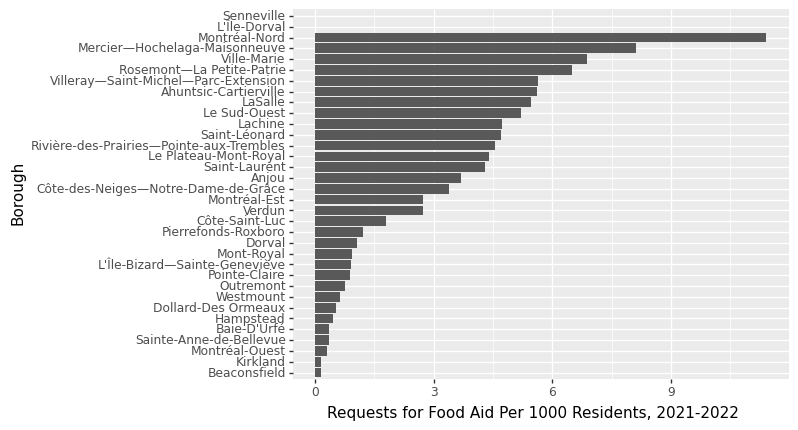

<ggplot: (8780835189101)>

In [49]:
barplot('NOM_OFFICIEL',"requests_per_1000", "Borough", "Requests for Food Aid Per 1000 Residents, 2021-2022")

### Demand for Food Aid Relative to the Distribution of Food Aid Organizations by Borough, 2021-2022
This map looks at the demand (or requests for food aid) compared to the number of food aid organizations in each borough. This analysis accounts for accessiblity to food aid organizations. So, for example, for every food organization in the borough of Montreal-Nord, there are 108 people requesting for services. The top results were the following:
- Pierrefonds-Roxboro: 112 requests per organization
- Montreal-Nord: 108 requests per organization
- Saint-leonard: 91 requests per organization


In [53]:
mappingAid("requests_per_business", "Food Requests Relative to Food Aid Organizations by Borough, 2021-2022")

/usr/local/lib/python3.9/dist-packages/plotnine/layer.py:391: PlotnineWarning: position_stack : Removed 12 rows containing missing values.


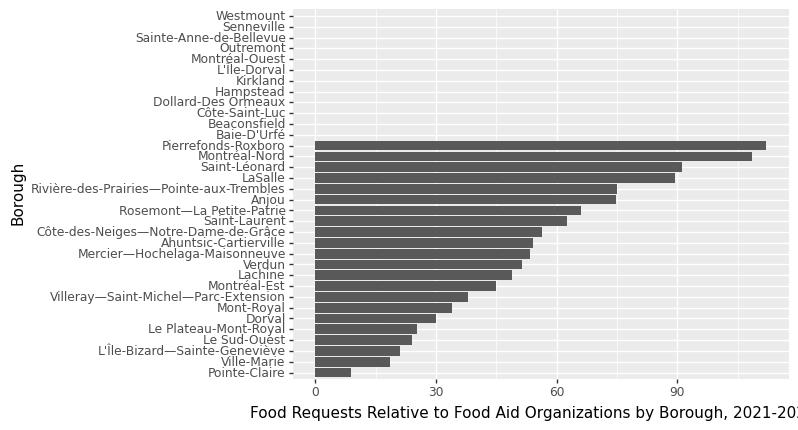

<ggplot: (8780834549944)>

In [55]:
barplot('NOM_OFFICIEL',"requests_per_business", "Borough", "Food Requests Relative to Food Aid Organizations by Borough, 2021-2022")

In [70]:
mappingAid('pct_low_income', "Percentage of Low Income Households by Borough")

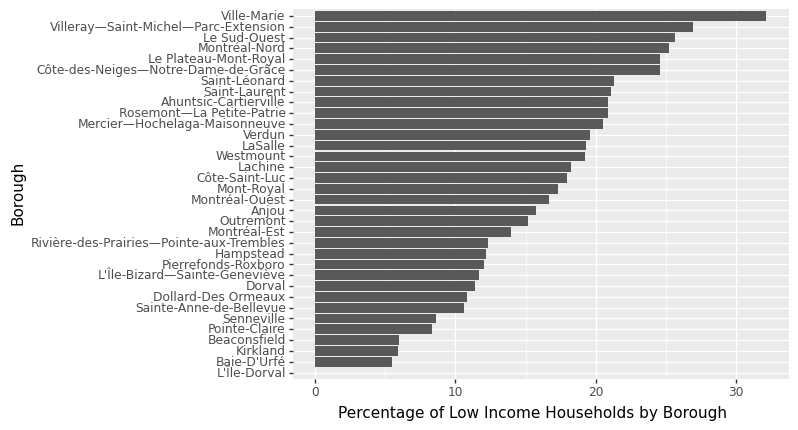

<ggplot: (8780834032412)>

In [57]:
barplot('NOM_OFFICIEL',"pct_low_income", "Borough", "Percentage of Low Income Households by Borough")

In [69]:
# print(boundaries.dropna(subset=["pct_low_income"])["pct_low_income"].quantile(0.0),
# boundaries.dropna(subset=["pct_low_income"])["pct_low_income"].quantile(1))

0.0 32.15


In [ ]:
# from shapely.geometry import Point, Polygon

# def check_point(row):
#   point = Point(row["x"], row["y"])
#   polygon = polygons[row["polygon_id"]]
#   return polygon.contains(point)
  

### Results and Analysis :
